In [1]:
import torch

In [2]:
import torchvision.transforms as transforms

In [3]:
from torchvision.utils import save_image

In [155]:
my_transforms = transforms.Compose([
    #transforms.RandomHorizontalFlip(p = 0.5), 
    transforms.ToTensor()])

In [156]:
from data_loaders import Plain_Dataset, eval_data_dataloader

In [157]:
from torch.utils.data import DataLoader, Dataset


In [158]:
from data_loaders import Plain_Dataset, eval_data_dataloader

In [159]:
whole_csv_file = "fer2013.csv"

In [160]:
import pandas as pd

In [161]:
data= pd.read_csv("fer2013.csv")

In [162]:
data.to_csv("data/whole_dataset.csv")

In [163]:
def str_to_image( str_img = ' '):
        '''
        Convert string pixels from the csv file into image object
            params:- take an image string
            return :- return PIL image object
        '''
        imgarray_str = str_img.split()
        #print(len(imgarray_str))
        imgarray = np.asarray(imgarray_str,dtype=np.uint8).reshape(48,48)
        return Image.fromarray(imgarray)

In [164]:
from __future__ import print_function
import pandas as pd
import numpy as np
from PIL import Image
import os
from tqdm import tqdm

In [165]:
def save_images( datatype='whole_dataset'):
        '''
        save_images is a function responsible for saving images from data files e.g(train, test) in a desired folder
            params:-
            datatype= str e.g (train, val, test)
        '''
        foldername= "data/"+datatype+"/"
        csvfile_path= "data/"+datatype+'.csv'
        if not os.path.exists(foldername):
            os.mkdir(foldername)

        data = pd.read_csv(csvfile_path)
        images = data['pixels'] #dataframe to series pandas
        numberofimages = images.shape[0]
        for index in tqdm(range(numberofimages)):
           # print(len(images[index].split()))
            img = str_to_image(images[index])
            img.save(os.path.join(foldername,'{}{}.jpg'.format(datatype,index)),'JPEG')
        print('Done saving {} data'.format((foldername)))

In [166]:
save_images("whole_dataset")

100%|███████████████████████████████████| 35887/35887 [00:15<00:00, 2325.95it/s]

Done saving data/whole_dataset/ data


In [167]:
dataset= Plain_Dataset(csv_file="data/train.csv", img_dir = "data/train/", datatype = 'train', transform = my_transforms)


In [168]:
data_loader=   DataLoader(dataset,batch_size=128,shuffle = True,num_workers=0)

In [136]:
examples = next(iter(data_loader))


In [137]:
import matplotlib.pyplot as plt


128


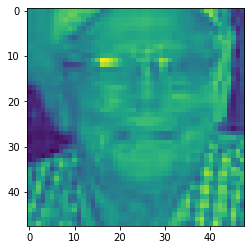

128


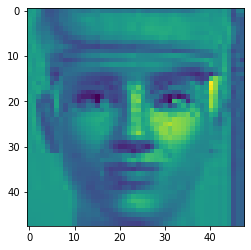

128


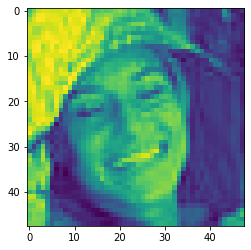

128


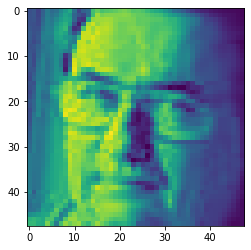

128


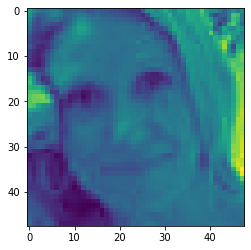

128


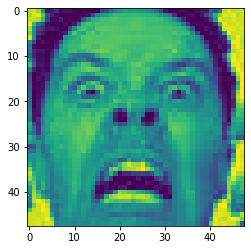

128


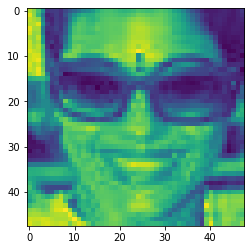

128


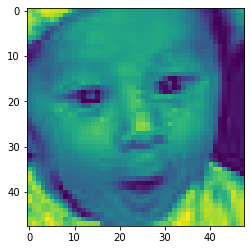

128


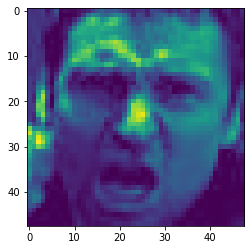

128


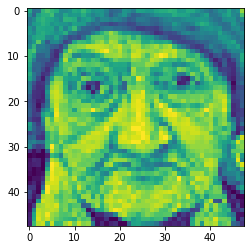

128


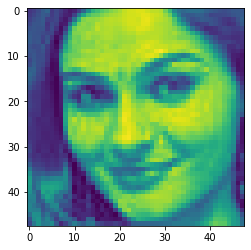

128


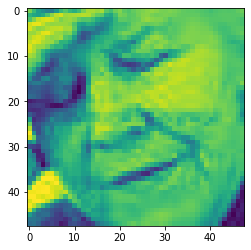

128


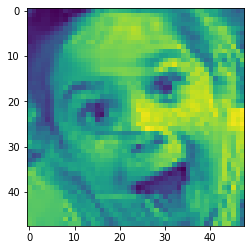

128


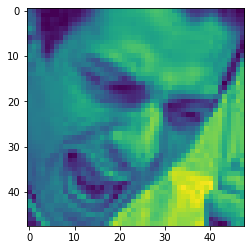

128


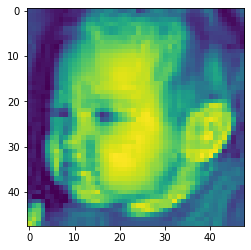

128


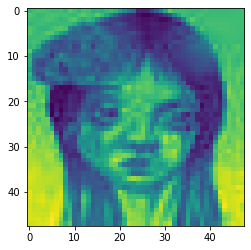

128


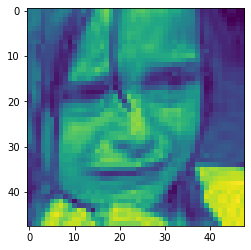

128


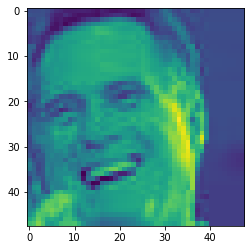

128


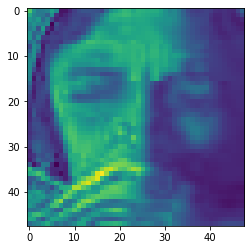

128


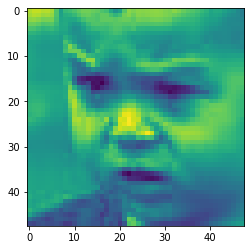

128


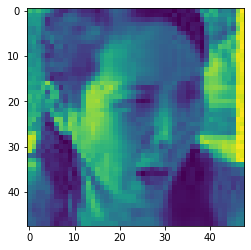

128


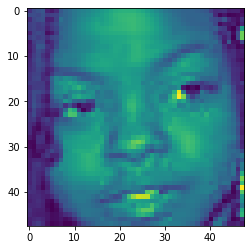

128


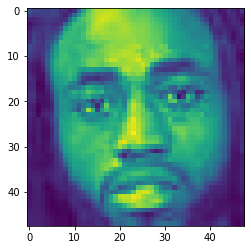

128


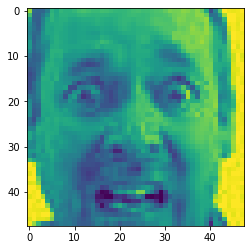

128


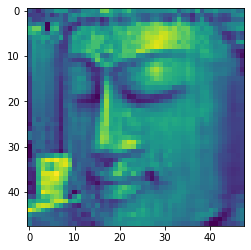

128


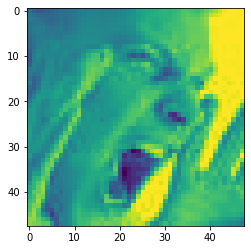

128


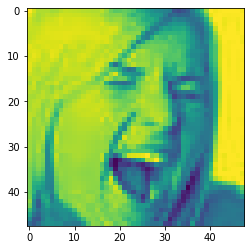

128


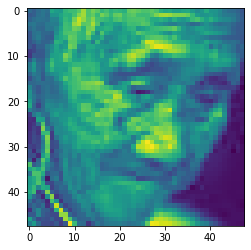

128


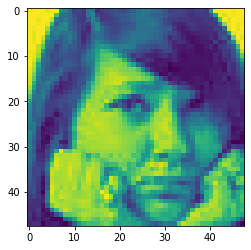

128


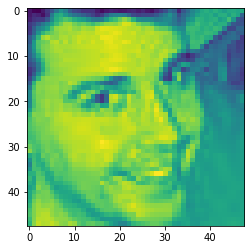

128


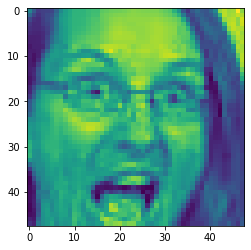

128


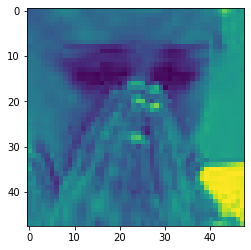

128


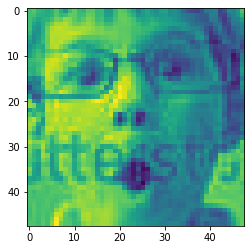

128


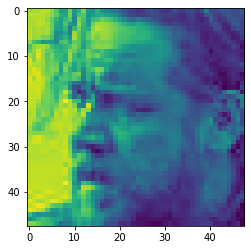

128


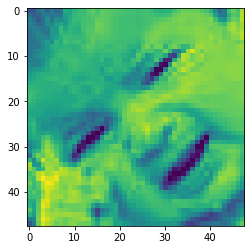

128


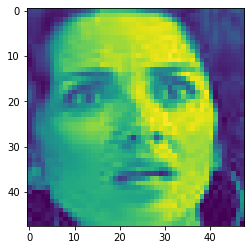

128


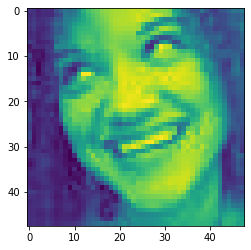

128


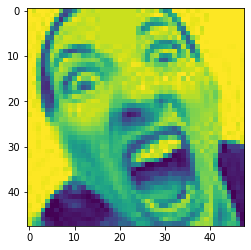

128


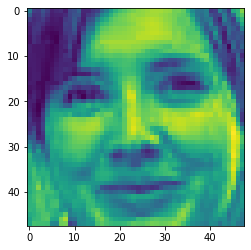

128


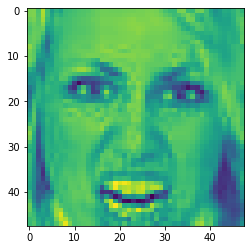

128


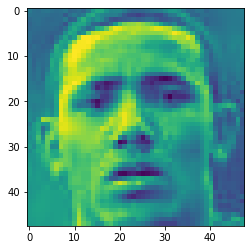

128


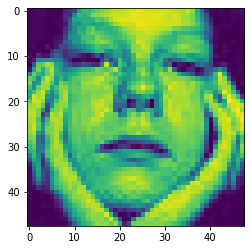

128


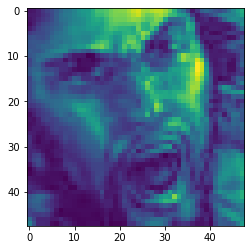

128


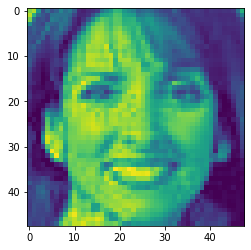

128


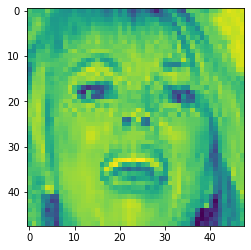

128


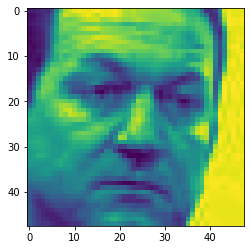

128


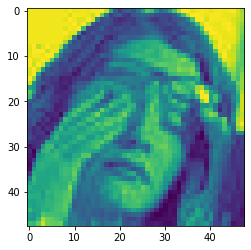

128


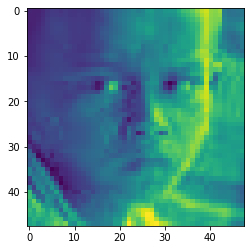

128


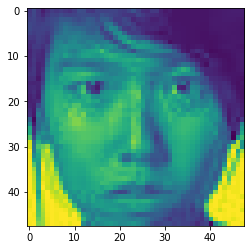

128


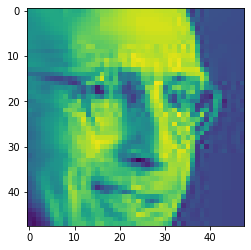

128


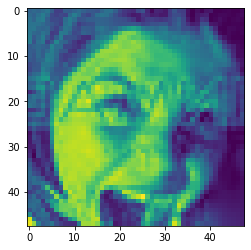

128


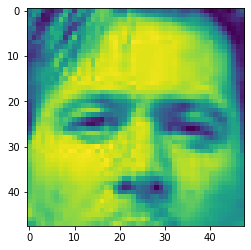

128


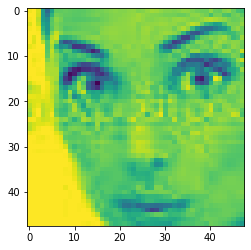

128


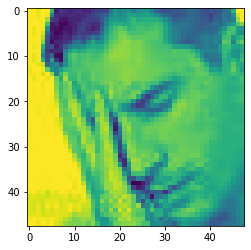

128


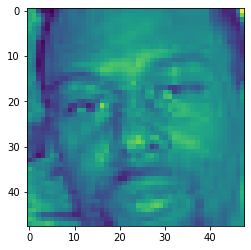

128


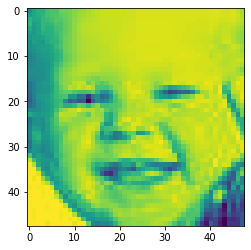

128


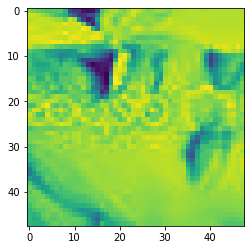

128


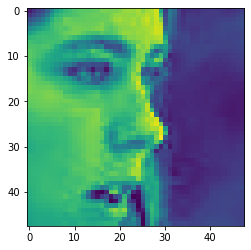

128


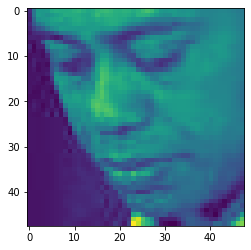

128


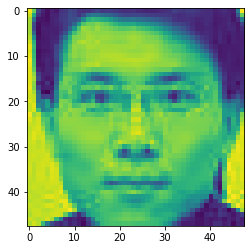

128


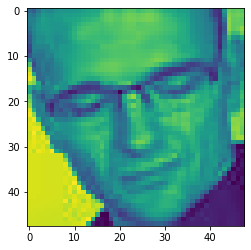

128


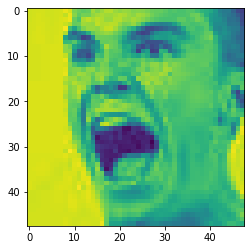

128


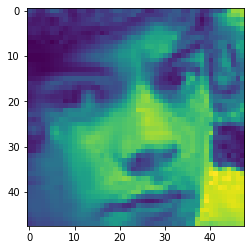

128


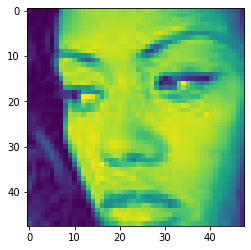

128


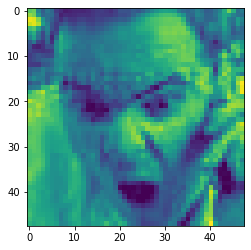

128


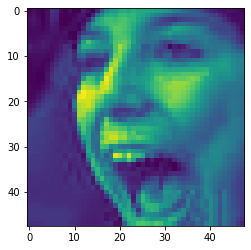

128


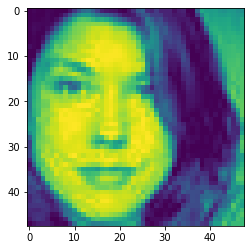

128


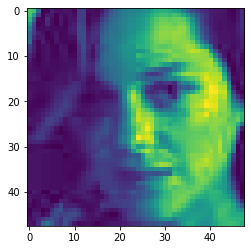

128


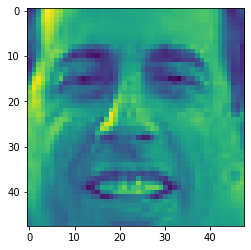

128


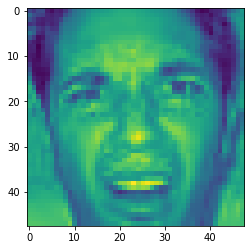

128


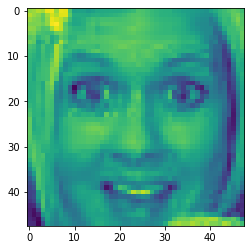

128


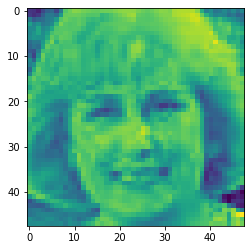

128


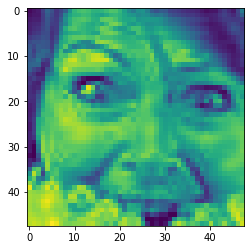

128


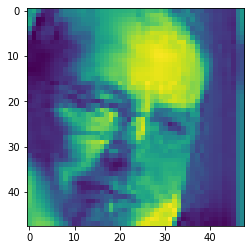

128


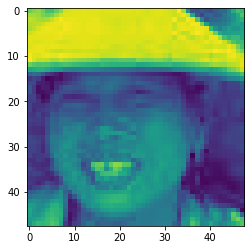

128


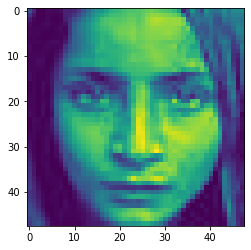

128


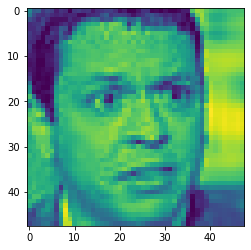

128


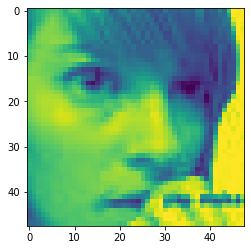

128


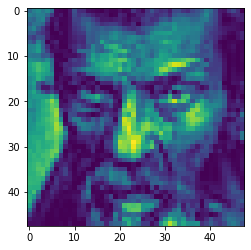

128


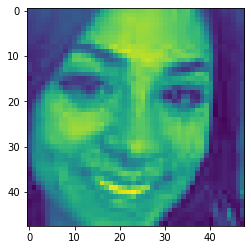

128


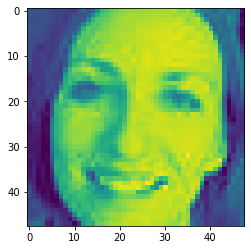

128


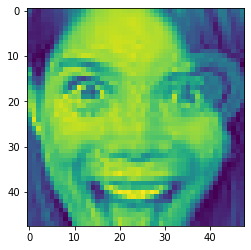

128


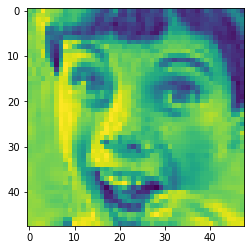

128


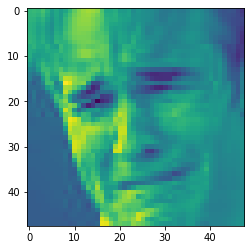

128


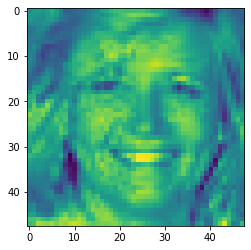

128


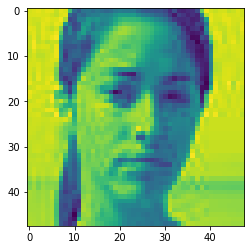

128


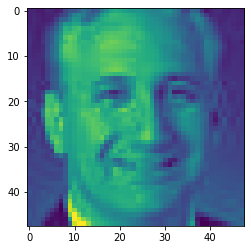

128


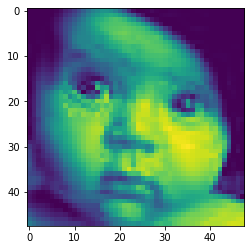

128


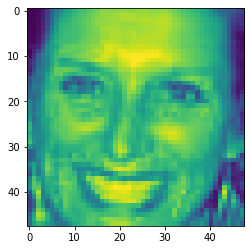

128


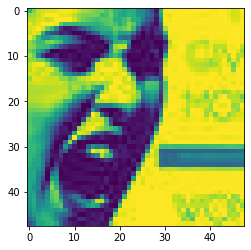

128


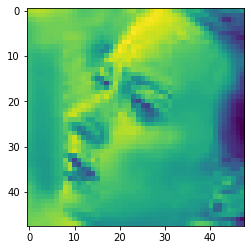

128


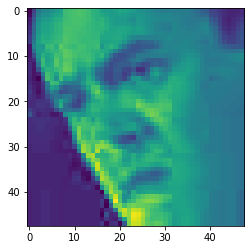

128


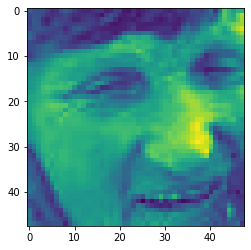

128


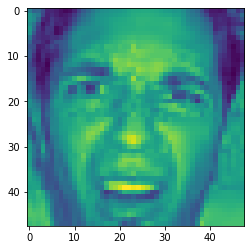

128


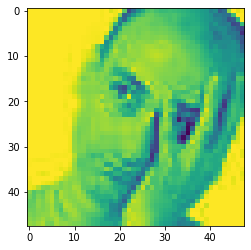

128


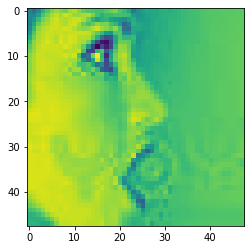

128


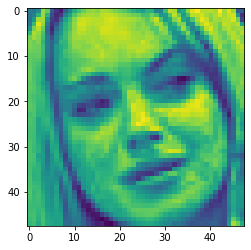

128


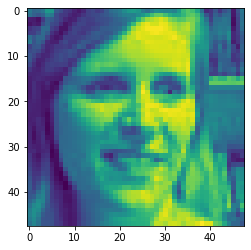

128


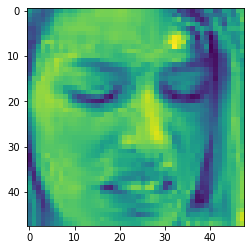

128


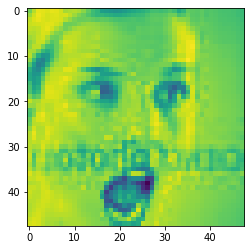

128


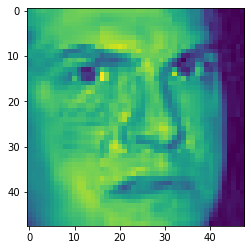

128


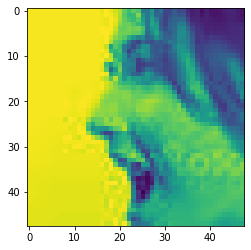

128


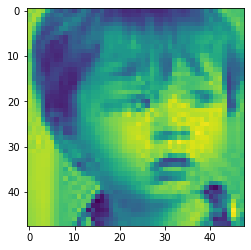

128


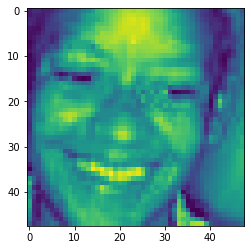

128


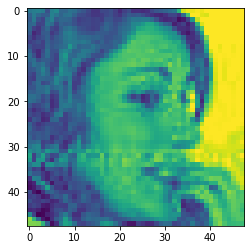

128


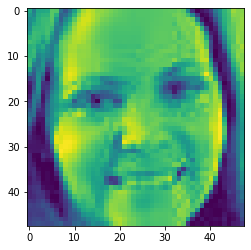

128


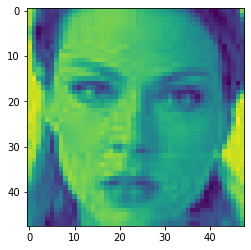

128


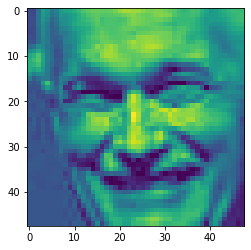

128


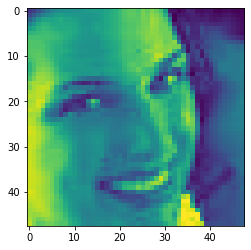

128


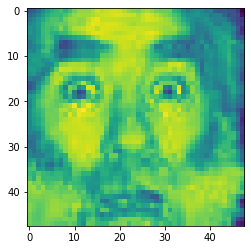

128


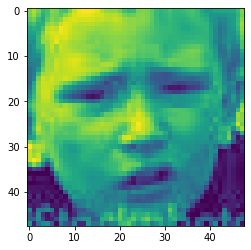

128


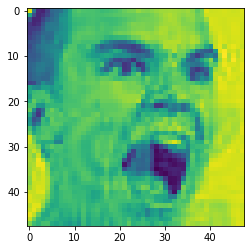

128


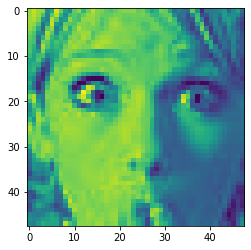

128


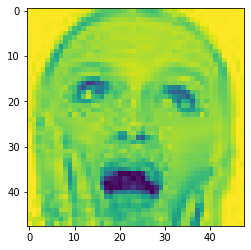

128


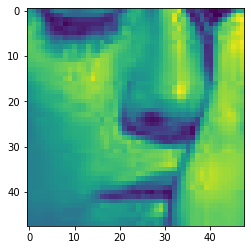

128


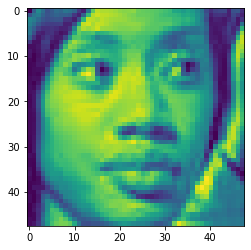

128


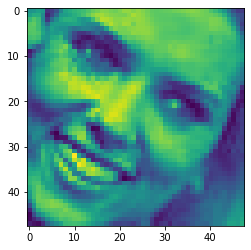

128


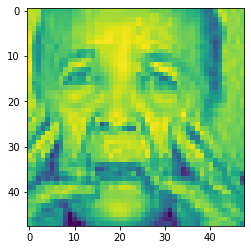

128


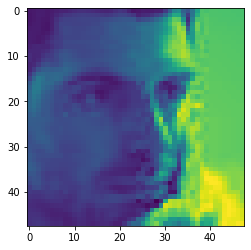

128


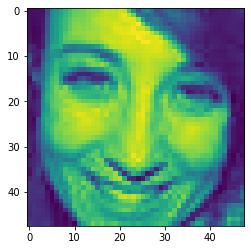

128


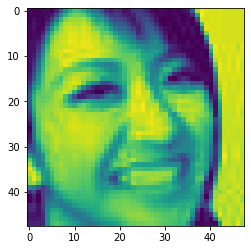

128


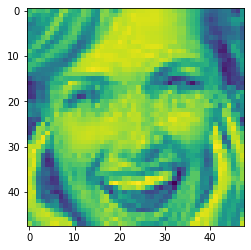

128


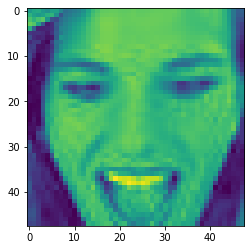

128


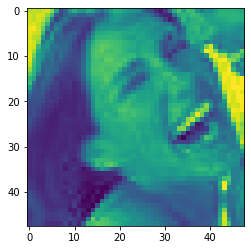

128


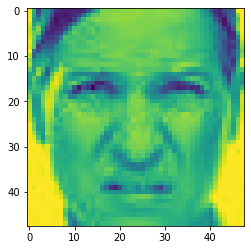

128


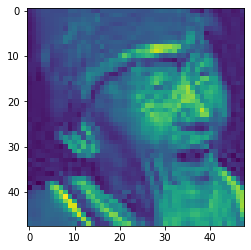

128


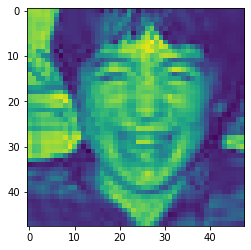

128


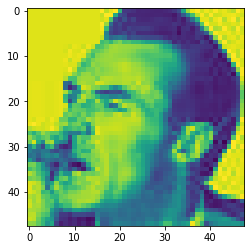

128


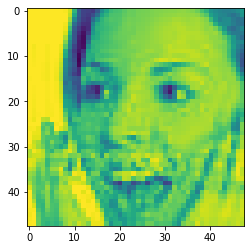

128


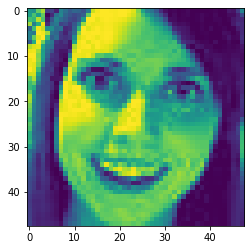

128


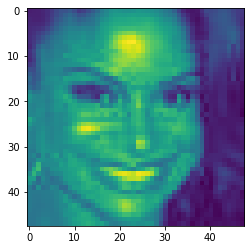

128


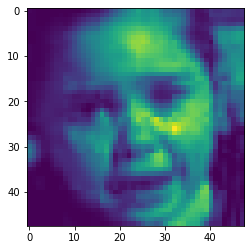

128


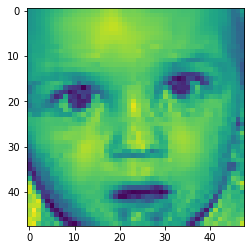

128


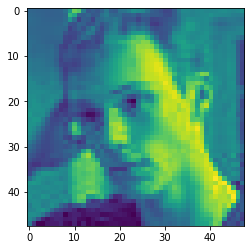

128


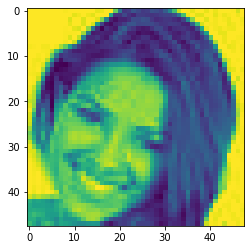

128


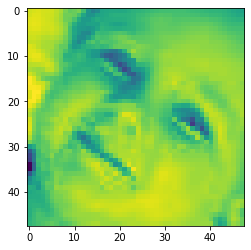

128


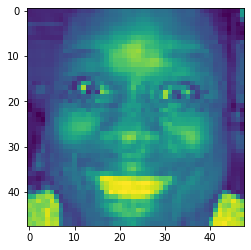

128


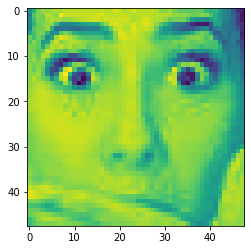

128


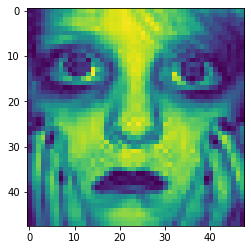

128


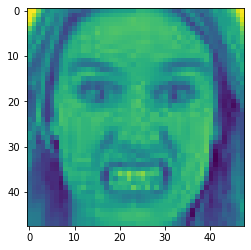

128


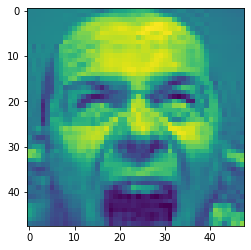

128


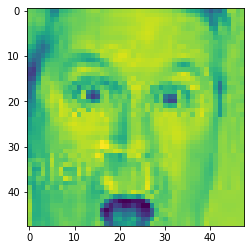

128


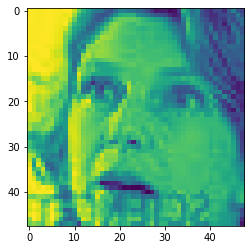

128


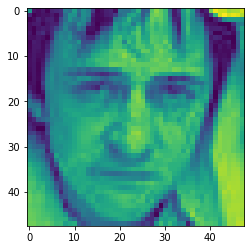

128


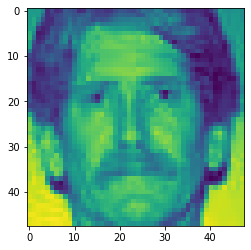

128


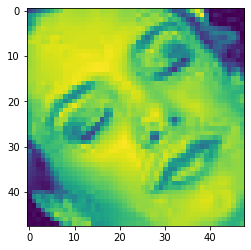

128


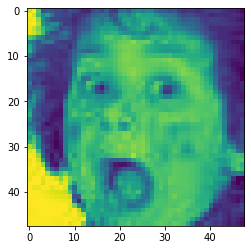

128


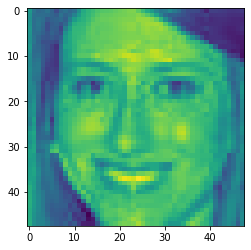

128


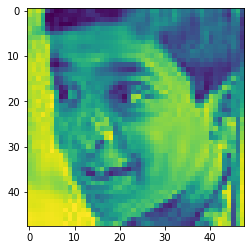

128


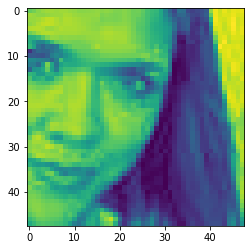

128


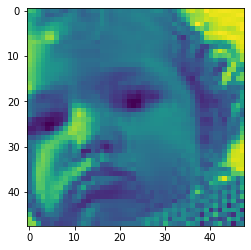

128


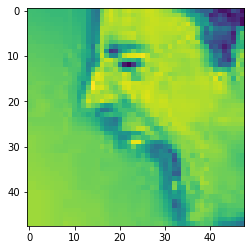

128


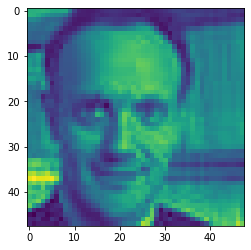

128


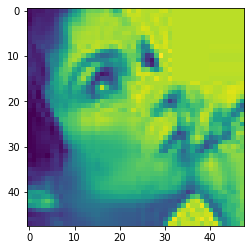

128


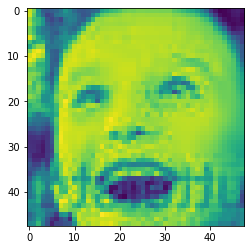

128


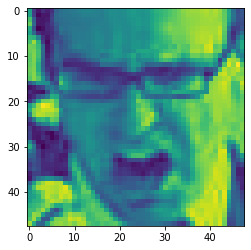

128


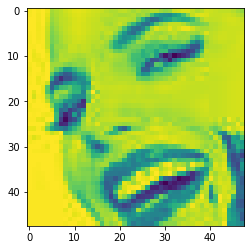

128


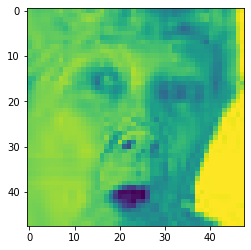

128


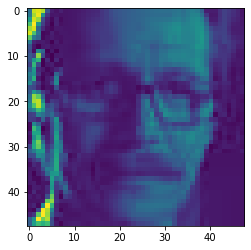

128


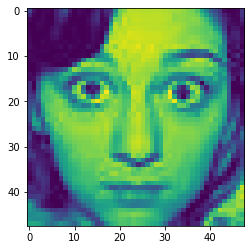

128


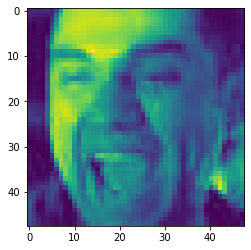

128


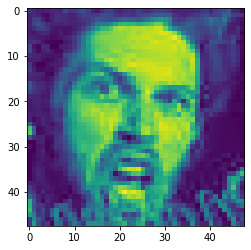

128


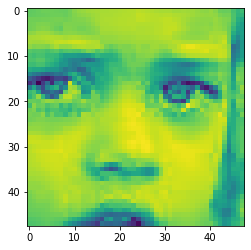

128


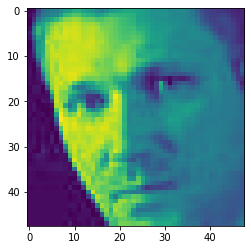

128


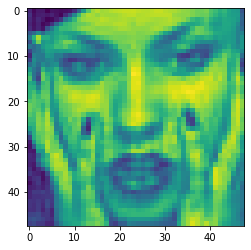

128


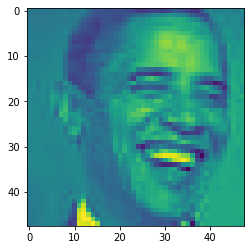

128


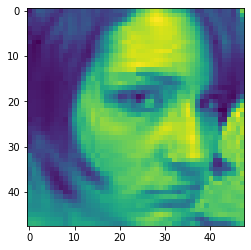

128


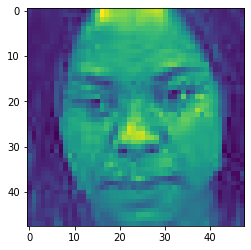

128


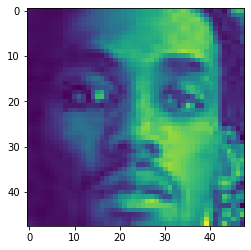

128


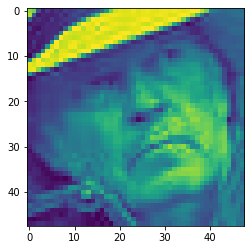

128


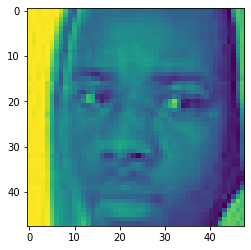

128


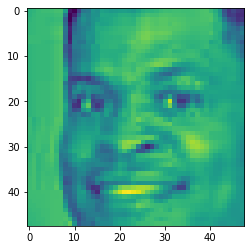

128


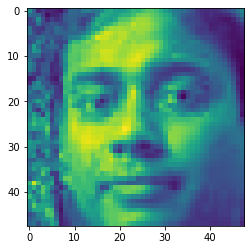

128


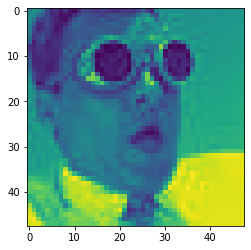

128


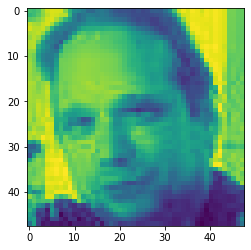

128


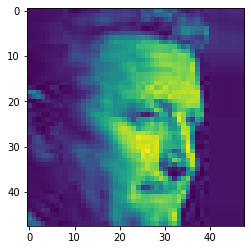

128


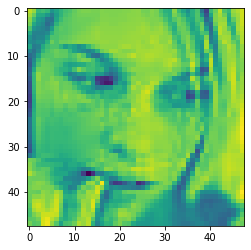

128


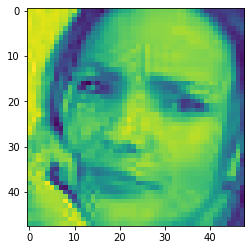

128


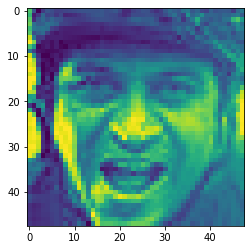

128


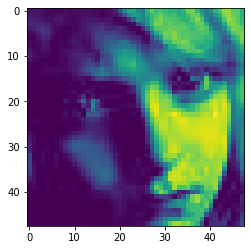

128


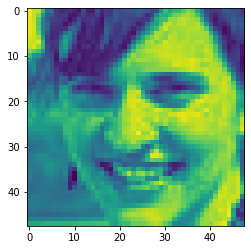

128


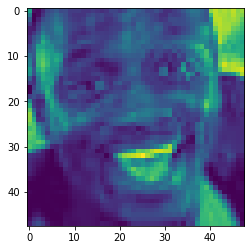

128


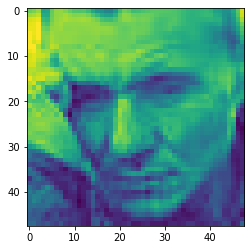

128


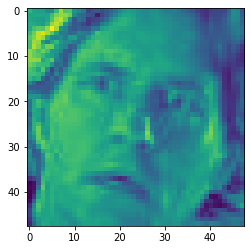

128


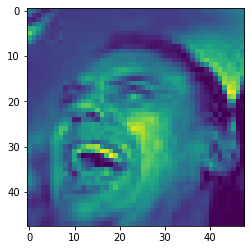

128


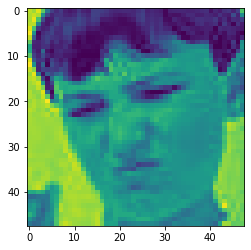

128


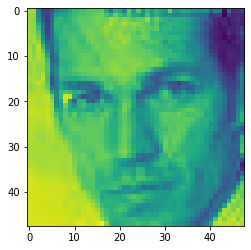

128


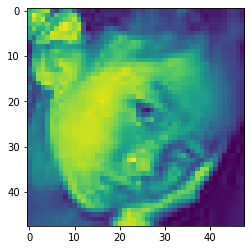

128


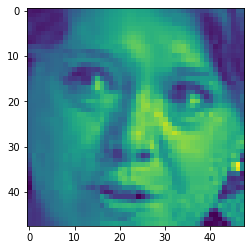

128


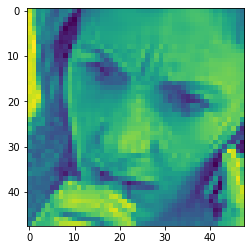

128


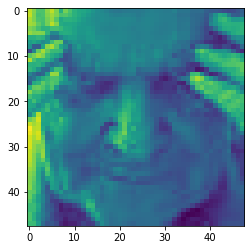

128


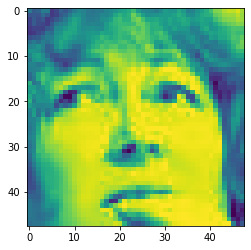

128


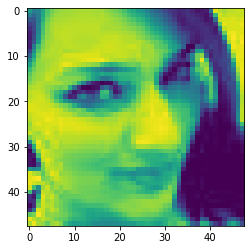

128


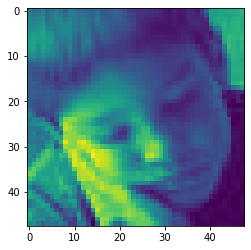

128


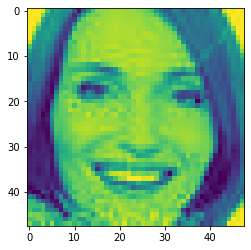

128


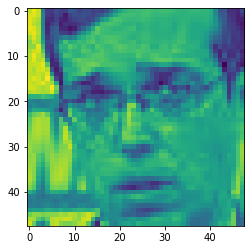

128


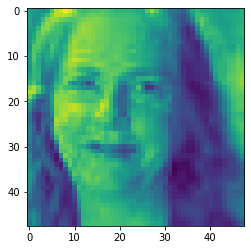

128


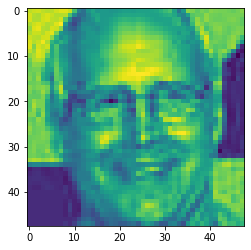

128


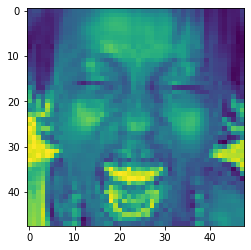

128


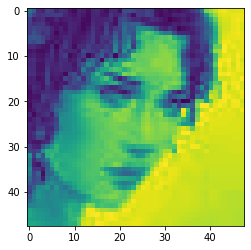

128


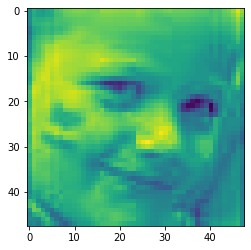

128


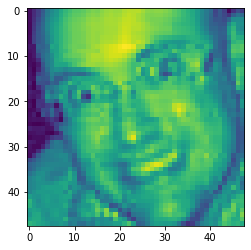

128


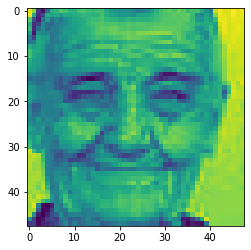

128


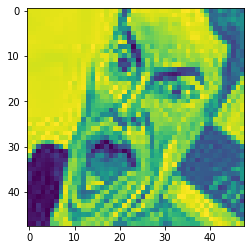

128


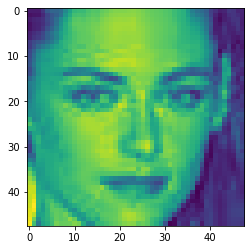

128


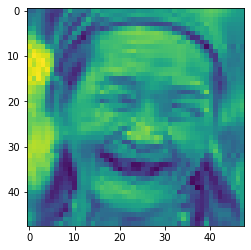

128


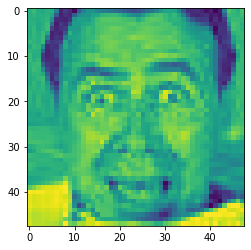

128


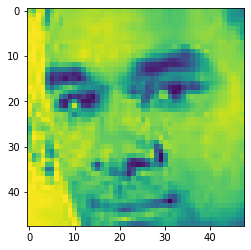

128


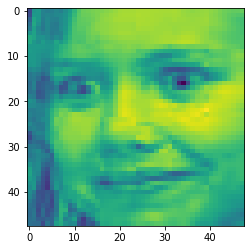

128


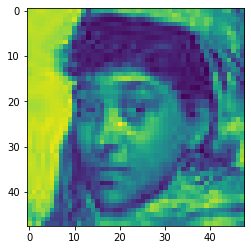

128


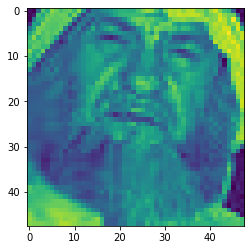

128


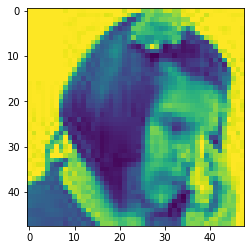

128


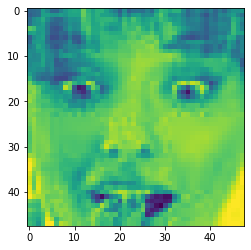

128


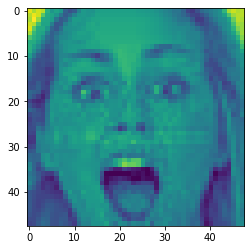

128


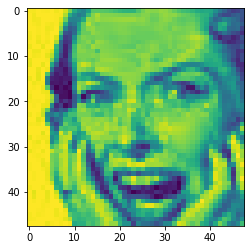

128


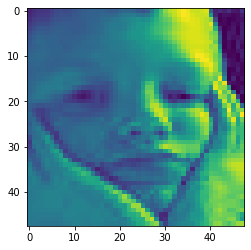

128


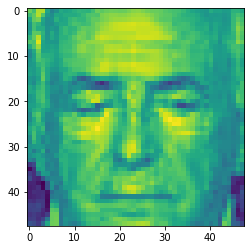

128


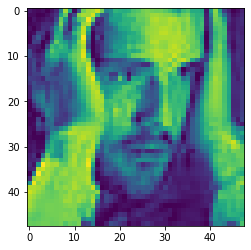

128


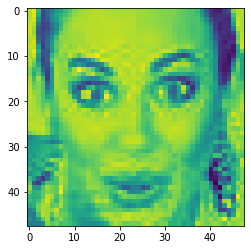

128


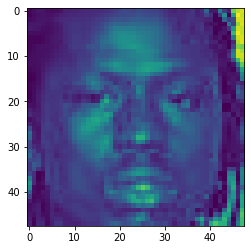

128


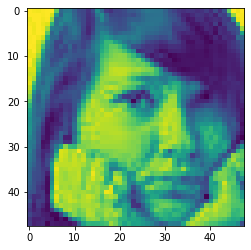

128


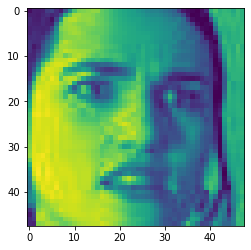

128


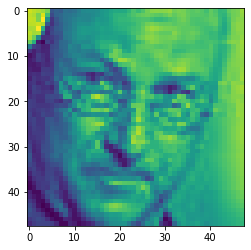

128


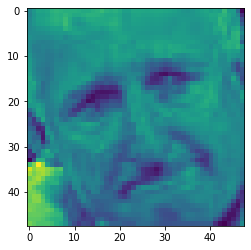

37


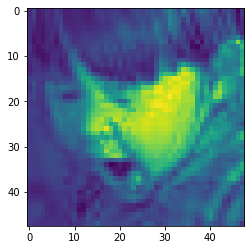

In [139]:
count = 0
for  batch_idx, (images, label) in enumerate(data_loader):
    #image = image.permute(1, 2, 0)
    print(len(images))
    for image in images:
        image = image.permute(1, 2, 0)
        #print(len(image.numpy())


        plt.figure()
        plt.imshow(image.numpy())
        plt.show()
        break
    

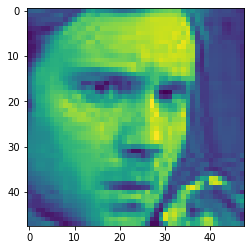

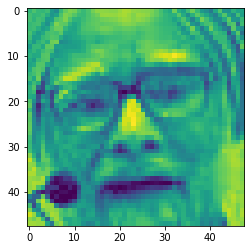

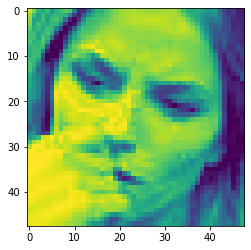

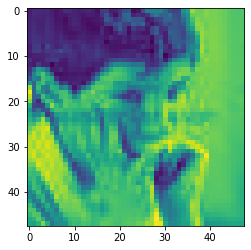

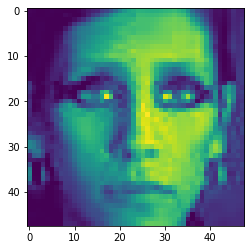

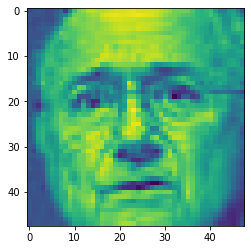

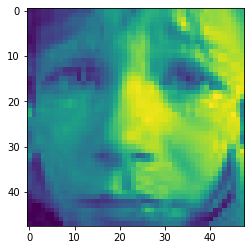

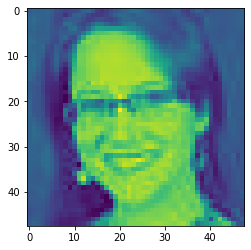

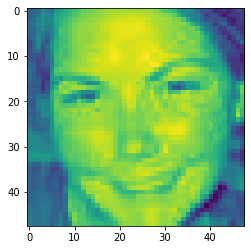

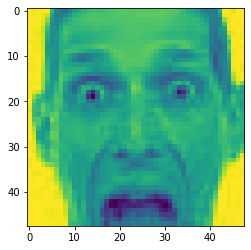

In [189]:
count = 0
for  image, label in dataset:
  
        image = image.permute(1, 2, 0)
        #print(len(image.numpy())


        plt.figure()
        plt.imshow(image.numpy())
        plt.show()
        count += 1
        if(count == 10):
            break
    

In [170]:
len(data)

35887

In [171]:
dataset[0][1]

tensor(0)

In [193]:
from PIL import Image


In [229]:
imageObject = Image.open("data/train/train0.jpg")


In [202]:
imageObject.show()


In [232]:
hori_flippedImage = imageObject.rotate(-10)

In [233]:
hori_flippedImage.show()


In [199]:
hori_flippedImage.save("test_image.png")

In [200]:
IO = Image.open("test_image.png")

In [201]:
IO.show()

In [203]:
train_d = pd.read_csv("data/train.csv")

In [204]:
train_d

Unnamed: 0  emotion                                             pixels  \
0               0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...   
1               1        0  151 150 147 155 148 133 111 140 170 174 182 15...   
2               2        2  231 212 156 164 174 138 161 173 182 200 106 38...   
3               3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...   
4               4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...   
...           ...      ...                                                ...   
28704       28704        2  84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...   
28705       28705        0  114 112 113 113 111 111 112 113 115 113 114 11...   
28706       28706        4  74 81 87 89 95 100 98 93 105 120 127 133 146 1...   
28707       28707        0  222 227 203 90 86 90 84 77 94 87 99 119 134 14...   
28708       28708        4  195 199 205 206 205 203 206 209 208 210 212 21...   

          Usage  
0      Training  
1      Training  
2      Training  
3      Training  
4      Training  
...         ...  
28704  Training  
28705  Training  
28706  Training  
28707  Training  
28708  Training  

[28709 rows x 4 columns]

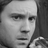

In [206]:
imgarray_str = train_d.iloc[0]["pixels"].split()
imgarray = np.asarray(imgarray_str,dtype=np.uint8).reshape(48,48)
Image.fromarray(imgarray)

In [207]:
IO.show()

In [213]:
train_d.columns

Index(['Unnamed: 0', 'emotion', 'pixels', 'Usage'], dtype='object')

In [225]:
new_row = {"Unnamed: 0": 28709, "emotion": 0,"pixels": "X", "Usage" : "Training" }
train_d = train_d.append(new_row, ignore_index=True)

/tmp/ipykernel_348665/459540123.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d = train_d.append(new_row, ignore_index=True)


In [227]:
train_d.drop(train_d.index[28709:], inplace=True)

In [228]:
train_d

Unnamed: 0  emotion                                             pixels  \
0               0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...   
1               1        0  151 150 147 155 148 133 111 140 170 174 182 15...   
2               2        2  231 212 156 164 174 138 161 173 182 200 106 38...   
3               3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...   
4               4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...   
...           ...      ...                                                ...   
28704       28704        2  84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...   
28705       28705        0  114 112 113 113 111 111 112 113 115 113 114 11...   
28706       28706        4  74 81 87 89 95 100 98 93 105 120 127 133 146 1...   
28707       28707        0  222 227 203 90 86 90 84 77 94 87 99 119 134 14...   
28708       28708        4  195 199 205 206 205 203 206 209 208 210 212 21...   

          Usage  
0      Training  
1      Training  
2      Training  
3      Training  
4      Training  
...         ...  
28704  Training  
28705  Training  
28706  Training  
28707  Training  
28708  Training  

[28709 rows x 4 columns]

In [216]:
train_d["emotion"].value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: emotion, dtype: int64

In [211]:
start_index = 28709

In [241]:
for i in range(0, len(train_d)):
        if(train_d.iloc[i]["emotion"] == 1):
            image = Image.open("data/train/train"+ str(i)+".jpg")
            new_image = image.transpose(Image.FLIP_LEFT_RIGHT)
            new_image.save("data/train/train"+str(start_index)+".jpg")
            new_row = {"Unnamed: 0": start_index, "emotion": 1,"pixels": "X", "Usage" : "Training" }
            train_d= train_d.append(new_row,ignore_index=True)
            start_index+=1
            new_image = image.rotate(10)
            new_image.save("data/train/train"+str(start_index)+".jpg")
            new_row = {"Unnamed: 0": start_index, "emotion": 1,"pixels": "X", "Usage" : "Training" }
            train_d= train_d.append(new_row,ignore_index=True)
            start_index+=1
            new_image = image.rotate(-10)
            new_image.save("data/train/train"+str(start_index)+".jpg")
            new_row = {"Unnamed: 0": start_index, "emotion": 1,"pixels": "X", "Usage" : "Training" }
            train_d= train_d.append(new_row,ignore_index=True)
            start_index+=1


/tmp/ipykernel_348665/3786588661.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3786588661.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3786588661.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3786588661.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3786588661.py:12: FutureWarning: The frame.append method is deprecated and w

In [247]:
train_d["emotion"].value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1    1744
Name: emotion, dtype: int64

In [263]:
im = Image.open("data/train/train32012.jpg")

In [264]:
im.show()

In [266]:
train_d.to_csv("data/train.csv")

In [268]:
train_d = pd.read_csv("data/train.csv")

In [269]:
train_d

Unnamed: 0.1  Unnamed: 0  emotion  \
0                 0           0        0   
1                 1           1        0   
2                 2           2        2   
3                 3           3        4   
4                 4           4        6   
...             ...         ...      ...   
32012         32012       32012        2   
32013         32013       32013        2   
32014         32014       32014        2   
32015         32015       32015        2   
32016         32016       32016        2   

                                                  pixels     Usage  
0      70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training  
1      151 150 147 155 148 133 111 140 170 174 182 15...  Training  
2      231 212 156 164 174 138 161 173 182 200 106 38...  Training  
3      24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training  
4      4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training  
...                                                  ...       ...  
32012                                                  X  Training  
32013                                                  X  Training  
32014                                                  X  Training  
32015                                                  X  Training  
32016                                                  X  Training  

[32017 rows x 5 columns]

In [249]:
start_index = 30017
count = 0
for i in range(0, len(train_d)):
        print(count)
        if(train_d.iloc[i]["emotion"] == 0):
            image = Image.open("data/train/train"+ str(i)+".jpg")
            new_image = image.transpose(Image.FLIP_LEFT_RIGHT)
            new_image.save("data/train/train"+str(start_index)+".jpg")
            new_row = {"Unnamed: 0": start_index, "emotion": 0,"pixels": "X", "Usage" : "Training" }
            train_d= train_d.append(new_row,ignore_index=True)
            start_index+=1
            count += 1
            if(count >= 1000 ):
                break
            

0
1
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
4
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
7
7
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

11
11
11
12
12
12
12
12
12
13
13
14
15
15
15
15
15
15
15
15
15
15
15
15
15
16
17
17
18
18
18
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
20
20
20
21
21
22
23
23
23
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
26


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
28
28
28
28
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
30
30
31
31
32
32
32
32
32
32
32
32
32
33
33
33
33
33
34
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
36
36
36
36
37
37
37
37
38
38
38
38
39
39
40
40
40
40
40
40
41
42
42
42
43
43
43
44
45
45
46
46
46
46
46
46
46
46


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

47
47
47
47
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
49
49
50
50
50
50
50
50
50
50
50
50
50
50
50
50
51
52
52
52
53
53
53
53
53
53
53
53
53
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
56
56
56
56
57
57
57
57
57
57
57
57
57
57
57
58
58
59
59
59
59
59
60
60
60
60
60
60
60
60
61
62
62
62
62
62
63
63
63
64
64
64
64
64
64
64
64
64
64
65
65
65
65
65
65


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

66
66
66
66
66
66
66
66
66
66
66
67
67
67
67
67
68
68
68
69
69
69
69
69
69
69
69
69
70
70
70
70
70
70
70
70
71
71
72
72
73
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
75
75
75
75
75
76
77
77
77
77
77
77
77
77
77
77
77
78
78
78
78
78
78
78
78
79
79
79
79
79
79
79
80
80
80
81
81
81
81
81
81
81
81
81
81
82
82
82
82
82
82
83
84
84
84
85
85
86
86
86
86


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

87
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
89
89
89
89
89
89
89
89
89
89
89
89
89
90
90
90
90
90
91
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
93
93
93
93
93
93
93
93
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
95
95
95
95
96
96
96
96
96
97
97
97
97
97
97
97
98
99
99
99
99
99
99
99
99
100
100
100
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
102
102
102
102
102
102
102
102
102
102
102
103
103
103
103
103
103
104
104
104
104
104


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

105
106
106
106
106
106
106
106
106
106
106
106
106
106
106
106
106
106
106
106
106
106
106
106
107
107
107
107
108
108
108
108
108
108
108
108
108
108
109
109
110
110
110
110
110
110
110
110
110
110
110
111
111
111
111
111
111
111
111
111
111
111
111
111
112
112
112
113
113
113
113
113
113
113
113
113
113
113
113
113
114
114
114
114
114
114
114
114
115
116
116
116
116
116
116
116
116
116
116
116
116
116
117
117
117
117
117
117
117
117
117
117
117
117
118
118
118
118
118
118
118
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
120
120
120
120
120
120
120
121
122
122
122
122
122
122
122
122
122
122


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

123
124
124
124
124
124
124
124
125
125
125
125
125
125
125
125
126
127
127
127
128
128
128
128
128
128
129
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
131
131
131
132
132
133
133
134
134
134
134
134
134
134
134
134
134
134
134
134
134
134
134
134
135
135
135
135
135
135
135
135
136
136
136
136
136
136
136
136
136
136
136
136
136
136
136
137
137
137
137
137
138
138
138
138
139
139
139
140
140
140
141
141
141
141
141
141
141
141
142
142
142
142
143
143
143
143
143
143
143
143
143
143
143


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

144
145
146
146
147
148
148
148
148
148
149
149
149
150
150
150
150
150
150
151
151
151
151
151
152
152
152
152
152
152
152
152
152
152
152
152
152
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
154
155
155
156
156
156
156
156
156
157
157
157
157
157
157
157
157
157
157
157
157
157
157
157
158
158
158
158
158
158
158
158
158
158
158
158
159
159
159
159
159
159
159
159
159
159
160
160
160
160
160
161
161
161
161
161
162
162
162
162
162
162
162
162
162
162
162
162


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

162
162
162
162
162
162
162
163
163
163
163
163
163
163
163
164
164
164
164
165
165
165
166
167
167
168
168
168
168
168
168
168
168
168
168
168
168
168
168
169
170
171
171
171
172
172
172
172
172
172
172
172
172
172
172
172
172
172
172
172
172
172
172
172
173
173
173
174
174
174
174
174
174
174
174
175
175
176
176
176
176
176
176
177
177
178
178


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

179
179
179
179
179
179
179
180
181
181
181
182
182
182
182
182
182
182
182
182
182
182
183
183
184
184
184
184
184
184
185
185
185
185
186
186
186
186
186
186
187
188
188
189
189
190
191
191
191
191
191
192
192
192
192
193
194
194
194
194
194
194
194
195
195
196
196
196
196
196
196
196
197
197
197
197
197
197
197
197


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

198
198
199
199
199
200
200
200
200
200
200
200
200
200
200
200
200
201
202
202
202
202
202
202
202
202
202
202
202
202
202
202
202
202
202
202
202
202
202
202
202
202
202
202
202
202
202
202
202
203
203
203
203
203
203
203
203
203
204
204
204
205
205
205
205
205
205
206
206
206
206
206
206
206
206
206
206
206
206
206
206
206
206
206
206
206
206
206
207
207
208
208
208
208
208
208
208
208
208
209
210
210
210
210
210
210
210
210
211
211
211
211
211
211
211
212
212
212
212
212
213
213
214
215
216


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

217
217
217
217
217
217
217
217
217
218
218
219
219
219
219
219
219
220
221
221
221
222
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
224
225
225
225
225
225
225
225
225
225
226
226
226
226
226
226
226
226
226
226
226
226
226
226
226
226
227
227
227
227
227
228
229
229
229
229
230
230
231
231
231
232
232
232
232
232
232
232
233
233
234
234
234
234
234
234
235
235
235
235
235
235
235
235
235


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

236
236
236
236
236
236
237
237
237
237
237
237
237
238
238
238
238
238
238
238
238
238
238
238
238
238
238
238
238
238
238
239
239
239
239
239
240
240
240
240
240
240
240
241
241
242
242
242
242
242
242
242
242
242
242
242
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
244
245
245
246
246
246
246
246
246
247
247
247
247
247
247
247
247
247
247
247
248
248
248
248
248
248
248
249
249
250
250
251
252
253
253
253
253
253
254
254
255
255


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

256
256
256
256
256
256
256
256
256
256
256
256
256
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
258
258
258
258
258
258
258
258
259
259
260
260
260
260
260
260
261
261
261
261
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
263
263
263
263
264
264
265
265
265
265
265
265
265
265
265
265
265
265
265
265
265
265
265
265
265
265
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
267
267
267
267
267
267
268
268
268
268
268
268
268
268
268
269
269
269
269
269
270
270
270
271
271
272
272
272
272
272
272
272
272
272
272
272
272
272
272
272
272
272
272
272
272
272
272
272
272
272
272
272
272
272
272
273
273
273
273
273
273
273
273
273
273
274
274
274
274
274
274
274
274
274
274
274
274
274
274


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

275
275
275
275
276
276
276
276
276
276
276
276
277
277
277
277
278
278
278
278
279
279
279
279
279
279
279
279
279
279
279
279
279
279
279
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
281
281
281
281
281
281
282
282
283
283
283
283
283
283
283
284
284
284
284
284
284
284
285
285
285
285
285
285
285
285
285
285
285
285
285
285
285
285
285
286
286
286
286
286
286
286
286
286
286
286
286
286
286
286
286
286
286
286
287
287
287
287
288
288
288
288
288
289
289
290
290
290
290
290
290
290
290
290
290
290
290
290
290
291
291
291
292
292
292
292
292
292
293
293
293
293
293
293
293
294
294
294
294


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

295
295
295
295
295
295
295
295
295
295
295
295
295
296
296
296
296
296
296
296
296
296
297
297
297
297
297
298
298
298
298
298
298
298
298
298
298
298
298
299
299
299
299
299
299
299
299
299
299
299
300
301
301
301
302
302
302
302
302
302
302
302
303
303
303
303
303
303
303
303
303
303
303
303
303
303
304
305
305
305
306
306
306
306
306
306
306
307
307
307
307
307
307
307
308
308
308
308
308
308
308
308
308
308
308
308
309
309
309
309
310
311
312
312
312
312
312
312
312
312
312
312
313
314
314
314


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

315
315
315
315
315
315
315
315
315
316
316
317
317
317
317
317
317
317
317
317
317
317
317
317
317
318
318
318
318
318
319
319
319
320
320
320
320
320
321
321
321
322
322
322
322
322
322
323
323
323
323
323
323
323
323
323
324
324
325
325
325
326
326
326
326
326
326
326
326
326
326
326
327
327
328
328
328
328
329
329
330
330
330
330
330
330
330
330
330
330
331
331
331
331
331
332
332
332
332
332
332
332
332
332
332
332
332
332
332
333
333
334
334
334
334


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

335
335
335
335
335
335
336
336
337
338
338
338
338
338
338
338
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
340
340
340
340
340
341
341
341
341
342
342
342
342
342
342
342
342
342
342
342
342
342
343
343
343
343
344
345
345
345
345
345
345
345
345
345
345
345
345
345
346
346
346
346
347
348
348
348
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
350
351
352
352
352
352
352
352
352
352
352
352
352
353
354
354
354
354
354
354
354
354
354
354
354
354


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

355
356
356
356
356
356
356
356
356
356
356
357
357
357
357
357
357
357
357
357
357
357
357
358
358
358
359
359
359
359
359
359
359
359
359
359
359
359
359
359
360
360
360
360
360
360
360
360
361
362
362
362
362
362
362
362
362
362
362
362
362
362
362
362
362
362
362
363
363
364
364
364
365
365
365
365
365
365
365
365
366
366
367
367
368
368
369
369
369
369
369
369
369
370
370
370
371
371
371
371
371
371
371
371
371
371
371
371
371
371
371
372
372
372
372
372
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

375
375
376
377
377
377
377
377
377
377
377
377
377
377
378
378
378
378
378
379
379
380
380
380
380
380
380
381
382
382
382
382
382
383
383
383
383
383
383
383
383
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
385
386
386
386
386
386
386
386
386
386
387
387
387
387
387
387
387
387
387
387
387
387
388
388
389
389
389
389
389
389
389
389
389
389
389
389
389
390
390
390
390
390
391
391
391
391
391
391
391
391
391
391
391
391
391
391
391
391
391
391
391
391
391
391
391
391
391
391
391
391
391
391
391
392
392
392
392
392
392
392
392
392
392
392
392
392
392
392
392


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

393
393
393
393
393
393
393
393
394
394
395
395
395
396
396
396
396
396
396
397
397
397
398
398
398
398
399
399
399
399
399
399
399
399
399
399
399
399
400
400
400
401
401
401
401
401
401
401
401
401
402
402
402
402
402
402
402
402
402
402
402
402
403
404
404
405
406
406
406
406
406
406
406
406
406
406
406
406
406
406
406
406
406
406
406
406
406
406
406
406
406
406
406
406
406
406
406
407
407
407
407
407
407
408
408
408
408
408
408
408
408
408
408
408
408
408
409
409
410
410
410
410
410
410
411
411
411
411
411
411
411
411
412
412
412


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

413
413
413
413
413
413
413
413
413
413
414
414
414
414
414
414
414
414
414
414
414
414
414
414
414
414
414
414
414
414
414
414
414
415
415
415
415
416
416
416
416
416
417
417
417
418
418
418
418
419
419
419
419
419
419
420
420
420
420
420
420
420
421
421
421
421
422
422
422
422
422
422
422
422
422
422
422
422
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
424
424
424
425
425
425
425
425
426
427
428
428
428
428
428
428
429
429
429
429
429
429
430
430
430
430
430
430


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

431
431
431
431
431
431
431
431
431
431
432
432
432
432
432
432
433
433
433
433
433
433
433
433
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
435
435
435
435
435
435
435
435
435
435
435
435
435
435
435
435
435
436
436
436
436
436
436
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
437
438
438
438
438
438
438
438
438
438
438
438
439
439
440
441
441
441
441
441
441
441
441
441
441
441
441
441
441
441
441
441
441
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
443
443
443
443
443
443
443
443
443
443
443
443
444
444
444
444
444
444
444
444
444
444
444
445
445
445
445
445
446
446
446
447


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

448
448
449
450
450
451
451
451
451
451
451
451
451
452
452
452
452
452
452
453
453
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
455
455
455
455
455
456
456
456
456
456
456
456
456
456
457
457
457
457
457
457
457
457
457
457
457
457
457
457
457
457
457
457
457
457
458
458
458
458
458
459
459
459
459
459
459
459
460
460
460
461
461
462
462
462
462
462
462
462
462
462
462
462
462
462
462
462
463
463
463
463
463
464
464
464
464
464
464
464
464
464
464
464
465
465
465
465
465
465
465
466
467
467
467
467
467
467
467
467
467
467
467
467
467
467
467
467
467
467
467
467
467
468


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

469
469
469
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
471
472
473
473
474
474
474
474
474
474
474
474
474
474
474
474
474
474
474
474
474
475
475
475
475
475
475
475
475
475
476
476
476
476
476
476
476
476
476
476
476
476
476
476
476
476
477
478
478
478
478
478
478
478
479
479
479
480
481
481
481
482
482
482
482
482
482
482
482
482
482
482
482
482
482
482
482
483
483
483
483
483
483
483
483
483
483
483
483
483
483
483
483
483
483
484
484
485
485
485
486
486
486
486
487
487
487
487
487
487
487
487
487
488


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

489
489
489
489
489
489
490
490
490
490
490
490
490
490
490
490
490
490
490
490
490
490
490
490
490
491
491
491
492
492
492
492
492
492
492
492
492
492
492
492
492
492
492
492
492
492
492
492
492
492
492
492
492
492
492
493
493
493
493
493
493
494
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
497
497
497
497
497
497
497
498
498
498
498
498
498
498
498
498
498
498
498
498
498
498
498
498
498
498
498
498
498
498
498
498
498
498
498
498
498
498
499
499
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
501
501
501
501
501
501
501
502
502
502
502
503
503
504
505
505
505
505
506
506
506
506
506
506


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

507
507
507
507
507
507
507
507
507
507
507
507
507
507
507
507
508
508
509
509
509
509
510
511
511
511
511
511
511
511
512
512
512
512
512
513
513
513
514
514
514
515
516
516
516
516
516
516
516
516
516
516
517
517
517
517
517
517
517
517
517
518
518
518
518
518
518
518
519
519
519
519
519
519
519
519
519
519
519
519
520
520
521
521
521
521
522
523
523
523
523
523
523
523
523
523
523
523
523
523
523
523
523
524
525
525
525
525
525
525
525
525
525
525
525
525
525
525
525
525
525
526
526
526
526
526
526
526
526
526
526
526
526
526
526


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

527
527
527
528
528
528
528
528
528
529
529
529
529
529
529
529
529
530
530
530
530
530
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
531
532
532
532
532
532
532
532
532
532
532
532
532
532
532
532
532
532
532
532
532
532
532
532
532
532
532
532
532
533
533
533
533
533
533
533
534
534
535
535
535
535
535
536
537
537
537
537
537
537
538
538
539
539
539
539
540
541
541
542
542
543
544
544


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

545
545
545
545
545
545
545
545
545
545
545
545
545
546
546
546
547
548
548
548
548
548
548
548
548
548
548
548
549
549
549
549
549
549
549
549
549
549
549
549
550
550
550
550
550
550
550
550
551
551
551
551
551
551
551
551
551
551
551
551
551
551
551
551
551
551
551
551
551
551
551
551
551
552
553
553
553
553
553
553
553
553
553
554
554
554
554
554
554
555
555
556
556
556
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
558
558
558
558
558
558
558
558
558
558
558
558
558
558
558
558
558
558
558
558
558
559
559
559
559


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

560
560
560
560
560
560
560
560
560
560
561
561
561
562
562
562
563
563
563
564
564
565
565
565
565
565
565
565
565
565
566
566
566
566
566
567
567
567
567
567
567
567
567
567
567
567
567
567
568
569
569
570
570
570
570
571
571
571
572
572
572
573
573
573
573
573
573
573
573
573
573
573
573
573
573
573
573
573
574
575
575
575
575
575
575
575
575
575
575
575
575
576
576
576
577
577
577
577
577
577


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

578
578
578
579
579
580
580
580
580
580
580
580
580
581
581
581
581
582
582
582
582
582
583
583
583
584
584
584
584
584
584
584
584
584
584
584
584
584
584
584
585
585
586
586
586
586
586
586
586
586
586
586
586
587
587
587
587
587
588
588
588
588
588
589
589
589
589
589
589
589
589
589
589
589
589
589
589
589
589
589
589
589
590
590
590
590
590
590
590
590
590
590
590
590
591
591
591
591
591
591
591
591
591
591
591
591
591
591
591
591
591
591
591
591
591
591
591
591
591
591
592
592
592
593
593
593
593
593
593
593
593
593
593
594
594
594


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

595
595
595
595
595
596
596
596
596
597
597
597
598
598
598
598
599
599
599
599
599
599
599
599
600
600
600
600
600
600
600
600
600
601
601
601
602
602
602
602
602
602
602
603
603
603
603
603
603
603
603
603
603
604
604
604
604
604
604
604
604
604
604
604
604
604
604
604
604
604
604
604
604
604
604
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
606
606
606
606
606
606
606
606
606
606
606
606
606
606
606
606
606
606
607
608
608
608
608
608
608
608
608
608
608
608
609
610
610
610
610
611
611
612
612
612
612
612
612
612
612
612
612
612
612


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

613
613
613
613
613
614
614
614
614
614
614
614
614
615
615
615
615
615
615
615
615
615
615
615
615
615
615
615
616
616
616
616
617
617
617
617
617
617
617
617
617
617
617
617
617
617
617
617
618
618
618
618
618
618
618
618
618
618
618
618
619
620
620
620
620
620
620
620
620
621
621
621
621
621
621
621
621
621
621
621
621
622
622
622
622
622
623
623
623
623
623
623
623
624
624
624
624
624
625
626
626
626
627
627
627
627
627
627
627
627
627
627
627
627
627
627
628
628
628
628
629
629
629
630
630
630
630
630
630
630
630
630


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

631
631
631
631
631
631
632
633
633
633
633
633
633
633
633
633
633
633
633
633
634
634
634
635
635
636
636
636
637
637
637
637
637
638
639
640
640
640
640
640
640
640
640
640
640
640
641
641
641
641
641
641
642
642
642
642
642
642
642
642
642
642
643
643
643
643
643
643
643
643
643
643
643
644
645
646
646
646
646
646
646
646
646
646
646
646
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
648
648
648
648
648
648


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

649
649
649
649
649
649
649
649
649
649
649
649
650
650
650
650
650
650
650
650
650
650
650
651
651
651
651
651
651
651
651
652
652
652
652
652
652
652
652
652
652
652
652
652
652
652
653
653
653
653
653
653
654
655
655
655
655
655
655
656
657
657
657
657
657
657
658
658
658
659
659
660
660
660
660
661
662
662
662
662
663
663
663
663
663
664
664
664
665
665
665
665
665
666
666


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

667
667
667
668
668
668
668
668
668
668
668
668
668
669
669
669
669
669
669
669
670
671
671
671
671
671
671
672
673
673
673
673
673
673
673
673
673
674
674
674
674
674
674
674
674
674
674
675
675
675
675
676
676
676
676
676
676
676
676
676
676
676
677
677
677
677
677
677
677
677
678
679
679
679
679
679
680
680
680
680
680
680
681
681
681
681
681
682
682
682
682
682
682
682
682
682
682
682
682
682
682
682
683
683
683
683
683
683
683
683
683
683
683
683
683
683
683
683
683
683
683
684
684
684
684
684
685
686


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

687
687
687
687
687
687
687
687
687
688
689
689
689
689
689
690
690
690
690
690
690
690
690
690
690
691
691
692
692
692
692
692
692
692
693
693
694
694
694
695
696
696
696
696
697
698
698
698
698
698
698
698
698
698
698
699
699
700
700
700
700
700
700
700
700
700
700
700
700
701
702
702
703
703
703
703
703
703
703
703
703
703
703
703
703
703
703
703
703
703
703
703
703
703
703
703
703
704
704
705
705
705
705
705
705
705
705
705
705
705
705
705
705
706
706
706
706
706
706
706
706
706


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

707
707
707
707
708
708
708
709
709
710
710
710
710
710
710
710
710
710
710
710
710
710
710
710
710
711
711
711
711
711
711
711
711
712
712
712
712
712
712
712
713
713
713
713
713
713
713
713
713
713
713
713
713
713
713
713
713
713
713
713
713
713
714
714
714
714
714
714
714
714
714
714
714
714
714
715
715
715
715
716
717
717
718
718
719
719
719
719
719
719
719
719
719
719
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
721
721
722
722
722
722
723
723
723
723
723
723
723
723
723
723
723
723
723
723
724
725
725
725
725
726
726
726
727
727
727
727
727
727
727
727
727


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

728
728
728
728
728
728
728
728
728
728
728
728
728
728
728
728
729
729
730
730
731
731
731
731
731
731
731
731
732
732
732
732
732
732
732
732
732
732
732
732
732
732
733
733
733
733
733
733
733
733
733
733
733
734
735
735
736
736
737
737
737
737
737
737
738
738
738
738
738
738
738
738
738
738
738
738
738
738
738
738
738
738
738
738
738
738
739
739
739
739
739
739
739
739
739
739
739
739
739
739
739
739
739
739
739
739
739
739
739
739
739
740
740
740
740
741
741
741
741
741
741
741
741
741
741
742
742
742
743
743
743
743
743
743
743
743
743
743
743
743
743
743
743
743
744
745
745
745
745
745
745
745
745
745
745
745
745


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

746
746
746
746
746
746
746
746
746
747
747
748
749
750
750
750
750
751
751
751
751
751
751
751
751
751
752
752
752
752
752
752
752
753
753
754
754
754
754
754
754
754
754
754
754
754
754
754
754
754
754
754
754
755
756
756
756
756
756
756
756
756
757
758
758
758
758
758
758
758
758
759
759
759
760
760
760
760
760
761
761
762
762
762
763
763
763
763
763
763
763
764
764
764
764
764
764
764
764
765
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
767


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

768
768
769
769
770
771
771
771
771
771
771
771
771
771
771
771
771
771
771
771
771
771
771
772
772
772
772
772
773
773
773
773
773
773
773
774
775
775
776
777
777
777
777
777
778
778
778
778
779
779
780
780
780
780
780
780
780
780
781
781
781
782
783
783
784
784
784
784
785
785
786
786
786
786
786
787
787
787
787
787
787
787
787
787
787
787
787
787
787
787
787
787
787
787
787


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

788
789
789
789
789
789
789
789
789
789
789
789
789
789
789
789
789
789
789
789
789
789
789
789
789
789
789
790
790
790
790
790
790
790
790
790
791
792
792
792
792
792
792
792
792
792
793
793
793
793
793
793
793
794
794
794
794
794
795
795
796
796
796
796
796
796
797
797
797
798
798
798
799
799
799
799
800
800
800
800
800
800
800
801
801
802
803
804
804
804
804
804
804
804
804
804
804
804
804
804
805
805
805
805
805
806
806
807
807
807
807
808
808
808
808
808
808
808
808
808
808
808
808


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

809
810
810
810
811
812
812
812
812
812
812
813
813
813
813
813
814
814
814
814
814
815
815
815
815
816
816
816
817
817
817
817
817
818
818
819
819
819
819
819
819
819
819
819
819
819
819
819
819
820
820
821
821
821
821
822
822
822
822
822
822
822
822
823
823
823
823
823
823
823
823
823
823
824
824
824
824
825
825
826
826
826
826
826
826
826
826
826
826
826
826
826
826
826
826
826
826
827
827
827
828
828
828
828
828
828
828
828
828
828
828
828
828
828
828
828
828
828
828
828
829
829
829
829
829
829
829
829
829


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

830
830
830
830
830
830
830
830
830
831
831
831
831
831
831
831
831
831
831
831
831
832
832
832
832
832
833
833
834
835
835
835
835
835
835
835
836
836
836
837
837
837
837
837
837
837
837
837
837
837
838
838
839
839
839
839
839
839
839
839
839
839
839
839
839
839
839
839
839
840
840
840
840
840
840
840
840
840
840
840
841
841
841
841
841
841
841
841
841
841
841
841
841
841
841
841
841
841
841
842
842
842
842
842
842
842
842
842
842
842
842
843
843
843
843
843
843
843
844
844
844
845
845
845
845
845
845
845
845
845
845
845
845
845
845
845
845
846
846
847
847
847
847
847
847
847
847
847
848
848
848
848


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

849
849
849
849
849
849
849
849
849
849
849
849
849
849
849
849
849
849
849
849
850
850
850
850
850
851
851
851
851
851
851
851
851
852
852
852
852
852
853
854
854
854
854
854
855
855
855
855
855
855
855
855
855
855
855
855
855
855
855
855
855
855
856
856
856
856
856
856
856
856
857
858
858
858
859
859
860
860
860
860
860
860
860
860
861
861
861
861
861
862
862
862
862
863
863
863
863
863
863
864
864
864
864
864
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
865
866
866
866
866
866
866
866
867
867
867
867
867
867
867
867
868
868
868
868


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

869
869
870
871
871
871
871
871
871
871
871
871
871
871
871
871
871
871
871
871
871
871
871
871
871
871
871
871
871
871
871
871
871
871
872
872
872
872
872
872
872
872
872
872
872
872
872
872
872
872
872
872
872
872
873
873
873
873
873
873
873
874
874
874
874
874
874
875
875
876
876
877
877
877
877
877
877
877
877
877
878
878
878
878
879
879
880
880
880
880
880
880
880
880
881
881
881
881
882
882
883
884
884
884
884
884
884
884
885
886
887
887
887


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

888
888
888
888
888
888
888
888
888
888
888
888
888
888
888
888
888
888
888
888
888
889
889
889
889
889
889
889
889
889
889
889
889
889
890
890
890
891
891
891
891
891
891
891
891
891
891
891
891
891
891
891
891
891
891
891
891
891
891
891
891
891
891
891
891
891
891
892
892
892
892
892
892
892
893
893
893
893
893
893
893
893
893
893
893
893
893
893
893
894
894
895
895
895
896
896
896
896
897
897
897
898
898
898
898
898
898
898
898
898
899
899
899
899
899
899
899
899
899
899
899
899
899
899
899
900
900
900
900
900
900
900
900
900
900
900
901
901
901
901
902
902
902
902
903
903
903
903
904
905
905
905
906
906
906
906
906
906
906
907


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

908
908
908
908
908
909
909
909
909
909
909
909
909
909
909
909
909
909
909
909
910
910
911
912
912
913
913
914
914
914
914
914
914
914
914
914
914
914
914
914
914
914
914
914
914
915
915
915
915
915
915
915
915
916
916
916
916
916
916
916
916
917
917
917
917
917
917
917
917
917
918
919
919
919
919
919
919
920
920
920
920
921
921
921
921
921
921
921
921
921
921
921
921
921
921
921
922
922
922
922
922
922
922
922
922
922
922
922
922
922
923
923
923
923
923
924
924
924
924
925
925
925
925
925
925
925
926
926
926
926
927
927
928
928


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

929
929
929
929
929
929
929
929
929
929
929
929
929
929
930
930
930
930
930
930
930
930
930
930
930
930
930
930
930
930
931
931
931
931
931
931
931
931
931
931
931
931
931
932
932
932
932
932
932
932
932
933
933
933
933
933
934
934
934
934
934
934
935
936
936
937
937
937
937
937
938
938
938
939
939
939
939
939
939
939
939
939
939
939
940
940
940
940
941
941
941
942
943
943
943
943
943
943
943
943
943
943
944
945
945
945
945
945
945
945
945
945
945
945
945
945
945
945
945
946
946
946
946
946
946
946
946
947
948
948
948
948
948
949
949
949
949
949


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

950
950
950
950
950
950
950
951
951
952
953
953
953
953
954
955
955
955
956
956
956
956
956
957
957
957
957
957
957
957
957
957
957
957
957
957
957
957
957
957
957
957
957
957
957
957
957
957
957
957
957
957
958
958
959
960
960
960
960
960
960
960
960
961
961
961
962
962
962
962
962
962
962
962
962
962
963
963
963
963
963
963
963
963
963
963
964
964
964
964
964
964
964
964
964
964
964
964
964
964
964
964
964
964
964
964
965
965
966
966
966
966
966
966
966
966
966
966
966
966
966
967
967
967
967
967
967
967
968
968
968
969
969
969
969
970


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

971
971
971
971
971
971
971
971
971
971
971
971
971
971
971
971
971
971
971
971
971
971
971
971
972
972
972
972
972
973
973
973
973
973
973
973
974
975
975
975
975
975
975
976
976
976
976
976
976
976
977
977
977
977
977
977
977
977
977
977
977
977
977
978
979
979
979
979
979
979
979
979
979
979
979
979
979
979
979
979
979
979
979
979
979
979
979
980
980
980
980
980
980
980
980
980
980
980
980
980
980
980
980
980
980
980
980
981
981
981
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
984
985
985
985
985
985
985
985
985
986
986
986
986
986
986
986
986
986
987
987
987
987
987
988
988
988
988
988
988
989
990
990
990
990
991
991
991
991
992
992
993
993
993
993
993
993
993
993
993
993
993
994
994
994
994
995
995
995
995
996
996
996
996


/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/3541100653.py:10: FutureWarning: The frame.append method is deprecated and

In [250]:
train_d

Unnamed: 0  emotion                                             pixels  \
0               0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...   
1               1        0  151 150 147 155 148 133 111 140 170 174 182 15...   
2               2        2  231 212 156 164 174 138 161 173 182 200 106 38...   
3               3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...   
4               4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...   
...           ...      ...                                                ...   
31012       31012        0                                                  X   
31013       31013        0                                                  X   
31014       31014        0                                                  X   
31015       31015        0                                                  X   
31016       31016        0                                                  X   

          Usage  
0      Training  
1      Training  
2      Training  
3      Training  
4      Training  
...         ...  
31012  Training  
31013  Training  
31014  Training  
31015  Training  
31016  Training  

[31017 rows x 4 columns]

In [253]:
train_d["emotion"].value_counts()

3    7215
0    4995
6    4965
4    4830
2    4097
5    3171
1    1744
Name: emotion, dtype: int64

In [254]:
start_index = 31017
count = 0
for i in range(0, len(train_d)):
        if(train_d.iloc[i]["emotion"] == 2):
            print(count)
            image = Image.open("data/train/train"+ str(i)+".jpg")
            new_image = image.transpose(Image.FLIP_LEFT_RIGHT)
            new_image.save("data/train/train"+str(start_index)+".jpg")
            new_row = {"Unnamed: 0": start_index, "emotion": 2,"pixels": "X", "Usage" : "Training" }
            train_d= train_d.append(new_row,ignore_index=True)
            start_index+=1
            count += 1
            if(count >= 1000 ):
                break
            

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999


/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d= train_d.append(new_row,ignore_index=True)
/tmp/ipykernel_348665/4254170927.py:10: FutureWarning: The frame.append method is deprecated and

In [255]:
train_d

Unnamed: 0  emotion                                             pixels  \
0               0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...   
1               1        0  151 150 147 155 148 133 111 140 170 174 182 15...   
2               2        2  231 212 156 164 174 138 161 173 182 200 106 38...   
3               3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...   
4               4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...   
...           ...      ...                                                ...   
32012       32012        2                                                  X   
32013       32013        2                                                  X   
32014       32014        2                                                  X   
32015       32015        2                                                  X   
32016       32016        2                                                  X   

          Usage  
0      Training  
1      Training  
2      Training  
3      Training  
4      Training  
...         ...  
32012  Training  
32013  Training  
32014  Training  
32015  Training  
32016  Training  

[32017 rows x 4 columns]

In [256]:
train_d["emotion"].value_counts()

3    7215
2    5097
0    4995
6    4965
4    4830
5    3171
1    1744
Name: emotion, dtype: int64